### Executive Summary:

In this exercise hash tables are examined by creating a dictionary data structure that uses hashing in the back-end. A hash table is a data structure that has keys and values that are mapped together. Basically, a hash function will map strings to numbers, or key values, that are combined into an array creating a hash table. Retrieving data from a hash table is very fast, making them powerful and useful, especially to the data engineer. It is an effective means to store and search data due to its performance and flexibility, particularly when dealing with complex data. It is recommended that hash tables are used for storing data, though collisions and load factors can become an issue.

The following exercise compares the performance of hash tables with two other search algorithms, linear and binary search. Linear search works by searching one item at a time, and will eliminate one item at a time if there is not a match. On the other hand, binary search works by taking the middle item and eliminates half the items every time if the search value is not found based on the "guesses" being either too high or too low. Further explanation on how the search algorithms work in relation to hash tables are detailed in this exercise. In addition, their relation to Big O notation is also discussed.

For comparison, a list of 100 randomly generated names were created. They were stored in an unsorted array, and a dictionary data structure was created based off the names. 5 random names were searched using linear search and dictionary search. The names in the unsorted array were then sorted using quicksort, and 6 names were selected based on the 10th, 30th, 50th, 70th, 90th, and 100th positions. The 6 names were then searched using binary and linear search, and were also retrieved from the dictionary that was based off the original unsorted array. Execution times were recorded. With regards to its effectiveness and performance, retrieving data from the dictionary showed the best results.          

In [1]:
#For math
import numpy as np
#For data
import pandas as pd
#For Plotting
import matplotlib.pyplot as plt
# Random generator
import random
# Timer
from timeit import default_timer as timer
#for string conversions
import string

### Define Functions:
 - The following four functions will be used for this exercise. They are for linear search, binary search, dictionary search, and quicksort. The search algorithms will be used to compare performance between searching from an array using linear and binary search, and retrieving from a dictionary (or hash table). 

#### Linear Search:

 - Big O Run time as **O(*n*)**, also known as linear time.
 - Linear search "guesses" one number at a time and eliminates one number at a time.
 - For example, if there are 100 items, if items are a sorted list and the max number is the right number, it will take 100 steps to get to that value. This will roughly take 100ms to run. It is also important to note that Big O does not tell you the speed in seconds. It tells how fast the operation grows [1].
 - Run time in Big O Notation for Linear Search is *n* as each element is checked.


In [86]:
# Linear search function
def linear_search(list, item):
    for i in range(len(list)):
        if (list[i] == item):
            return i;    
    return print('Item does not exist');

#### Dictionary Search:
 - On average (best case), Big O Run time as **O(1)**, and the value expressed is also known as constant time.
 - The constant is the fixed amount of time it takes to retrieve the item from the dictionary or hash table. **O(1)** time does not mean instant.
 - In the case of a dictionary or hash table, it does not matter if the table has 1 or a million items; getting an item from the hash table takes the same amount of time [1]. 
 - **O(1)** constant time is the average case; however at its worst case it can take **O(*n*)** time due to collisions.
 - Collision happens when two keys have been assigned to the same slot. A linked list can be used at the slot to mitigate collision, but can cause a significant slow down in the hash table if the linked list gets too large.
 - Therefore, having a good hash function, or one that distributes values evenly, and a low load factor is important. A load factor is basically the ratio of items in the hash table over the total number of slots. A general rule of thumb is to have a load factor lower than 0.7. A load factor can be reduced with resizing. 
 - It is also important to note that in the average case, or the best case, insertion and deletion of data also take **O(1)** time. At its worst, they can take **O(*n*)** time as well.  

In [116]:
# Dictionary search function
def dict_search(my_dict, val): 
    for key, value in my_dict.items(): 
        if val == value: 
            return key; 
    return print('Key does not exist')

#### Binary Search:
 - Big O Run time as **O(*log n*)**, also known as log time.
 - Binary search will will "guess" the middle item and eliminate half the items every time based on the "guesses" being either to high or too low [1].
 - For example, if there are 100 items, and half the items are eliminated every time with binary search, it will take seven steps to find the position of the value (as opposed to worst case being a 100 steps with linear search time). 100 items roughly takes 7ms to run*.
 - Run time in Big O Notation for Binary Search is log base 2 as log *n* elements are checked in the worst case [1].
 - Binary search only works if the list is in sorted order.

In [210]:
#Binary function
def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

  # While you haven't narrowed it down to one element ...
    while low <= high:
    # ... check the middle element
        mid = (low + high) // 2
        guess = list[mid]
    # Found the item.
        if guess == item:
            return mid
    # The guess was too high.
        if guess > item:
            high = mid - 1
    # The guess was too low.
        else:
            low = mid + 1

  # Item doesn't exist
    return print('Item does not exist.')

#### Quicksort:
 - As quick sort on average takes **O(*n log n*)** time, this algorithm is used as it is efficient, one of the fastest, and most commonly used sort algorithms.
 - The previous exercise showed that quick sort had the best performance when compared when insertion sort and merge sort.
 - On average it is faster than merge sort, as it has a smaller constant, or the fixed amount of time an algorithm takes.

In [88]:
# Quick sort function to list
def quick_sort(array):
    to_list = list(array)
    if len(to_list) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
        return to_list
    else:
    # recursive case
        pivot = to_list[0]
    # sub-array of all the elements less than the pivot
        less = [i for i in to_list[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
        greater = [i for i in to_list[1:] if i > pivot]
        return quick_sort(less) + [pivot] + quick_sort(greater)

# Quick sort function to array
def quick_sort_array(array):
    return(np.asarray(quick_sort(array))) 

### List of 100 Names Randomly Generated Stored in Unsorted Array:

In [73]:
# Create list of random names
names = np.array([])
for i in range(100):
    name = ''.join(random.choices(string.ascii_lowercase, k=10))
    names = np.append(names, name)
print('Number of names:', len(names))
print('Duplicates:', pd.DataFrame(names).duplicated().sum())

Number of names: 100
Duplicates: 0


### Select 5 Names Randomly:

In [85]:
# Randomly select 5 names
random.seed(55)
select_names = random.choices(names, k=5)
select_names

['kdfwfnsfvm', 'wvceqrjicg', 'nzqobmaznp', 'fubrcumzll', 'jcqoszrxew']

### Linear Search with Execution Times Noted (Unsorted Array):

In [335]:
# Linear Search with Execution Times Noted (Unsorted)
start = timer()
loc_arr_ls = np.array([], dtype=int)
for i in range(len(select_names)):
    search = linear_search(names, select_names[i])
    loc_arr_ls = np.append(loc_arr_ls, search)
end = timer()
exec_time_arr_ls = (end-start)*1000

print('Name Locations:', loc_arr_ls)
print('Execution Time(ms):', exec_time_arr_ls)

Name Locations: [ 9 95 14 73 84]
Execution Time(ms): 0.7107999990694225


### Unsorted Names Stored in Dictionary and Dictionary Search with Execution Times Noted:

#### Store Data in Dictionary (Keys from 0 to 99):
 - The dictionary data structure uses hashing in the back-end. 
 - A dictionary/hash table is a data structure that has keys and values that are mapped together. Basically, a hash function will map strings to numbers, or key values, that are combined into an array creating a hash table.
 - Also known as hash maps, maps, and associative arrays. 

In [104]:
# Create Dictionary
names_dict = {}
for i in range(len(names)):
    names_dict[i] = names[i] 

#### Dictionary Search with Execution Times Noted (Unsorted Dictionary):

In [359]:
# Dictionary Search with Execution Times Noted (Unsorted Dictionary)
start = timer()
key_dict = np.array([], dtype=int)
for i in range(len(select_names)):
    search = dict_search(names_dict, select_names[i])
    key_dict = np.append(key_dict, search)
end = timer()
exec_time_dict = (end-start)*1000

print('Name Keys:', key_dict)
print('Execution Time(ms):', exec_time_dict)

Name Keys: [ 9 95 14 73 84]
Execution Time(ms): 0.2896999976655934


### Table and Plot of Execution Times for 5 Randomly Chosen Names (Linear and Dictionary Search):

#### Table of Linear Search on Unsorted Array and Dictionary Search:
 - Difference in times are significant as dictionary retrieval took **O(1)** time for each item, and linear search took **O(*n*)** time as it had to search through each item in the array one at a time.
 - Times are based off of running two loops for a complete seach of all names selected.

In [360]:
unsorted_ls_dict = pd.DataFrame(np.array([exec_time_dict, exec_time_arr_ls])).transpose().rename(columns={
                                                                                       0:'Dictionary Search( ms)',
                                                                                       1:'Linear Search (ms)'})
unsorted_ls_dict

,Dictionary Search( ms),Linear Search (ms)
0,0.2897,0.7108


#### Plot of Linear Search on Unsorted Array and Dictionary Search :
 - Difference in times are significant as was shown in the table and explained in the commentary above.
 - It is evident that linear search is not used unless in circumstances where it is necessary.

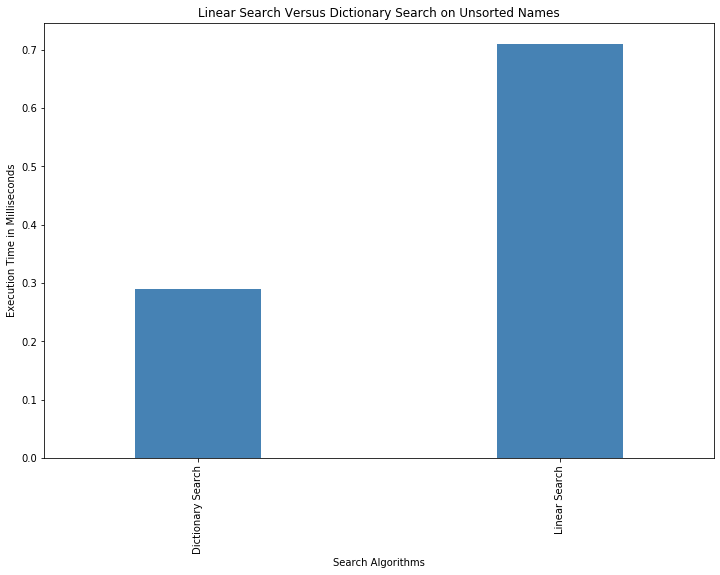

In [361]:
ax = unsorted_ls_dict.unstack().plot(kind='bar', width=0.35, color='steelblue', figsize=(12,8))
labels = ['Dictionary Search', 'Linear Search']
ax.set_xticklabels(labels)
plt.xlabel('Search Algorithms')
plt.ylabel('Execution Time in Milliseconds')
plt.title('Linear Search Versus Dictionary Search on Unsorted Names')
plt.show();

### Sort Array Using Quick Sort and Store Names at 10th, 30th, 50th, 70th, 90th, and 100th positions in Separate Array:
 - Quick sort is selected because it is a fast sorting algorithm, efficient, commonly used, and takes on average, **O(*n log n*)** time. 
 - The previous exercise showed that quick sort had the best performance when compared when insertion sort and merge sort.
 - On average it is faster than merge sort, as it has a smaller constant, or the fixed amount of time an algorithm takes.

In [183]:
#Sort names with quick sort
sorted_names = quick_sort_array(names)

In [193]:
#Store names at at 10th, 30th, 50th, 70th, 90th, and 100th positions in separate array
search_pos = [9, 29, 49, 69, 89, 99]
select_sort = np.array([])
for i in range(len(search_pos)):
    select_sort = np.append(select_sort, sorted_names[search_pos[i]])
select_sort

array(['ctxkrlionl', 'guwpykqont', 'lwsbcqzxvh', 'rokkslnqqb',
       'xarqwcnbhz', 'zspsycbuwr'], dtype='<U32')

### Linear, Binary, and Dictionary Search of Names Based on Selected Positions from Sorted Array with Execution Times Noted:
 - Dictionary search is based on original dictionary which is still based off of unsorted names.
 - Two loops are run with dictionary search and linear search. Only one loop is run with binary search.

In [232]:
# Linear Search with Execution Times Noted (Unsorted)
start = timer()
loc_sel_ls = np.array([], dtype=int)
for i in range(len(select_sort)):
    search = linear_search(sorted_names, select_sort[i])
    loc_sel_ls = np.append(loc_sel_ls, search)
end = timer()
exec_time_sel_ls = (end-start)*1000

print('Name Locations:', loc_sel_ls)
print('Execution Time(ms):', exec_time_sel_ls)

Name Locations: [ 9 29 49 69 89 99]
Execution Time(ms): 0.8679999991727527


In [236]:
# Binary Search with Execution Times Noted (Unsorted)
start = timer()
loc_sel_bs = np.array([], dtype=int)
for i in range(len(select_sort)):
    search = binary_search(sorted_names, select_sort[i])
    loc_sel_bs = np.append(loc_sel_bs, search)
end = timer()
exec_time_sel_bs = (end-start)*1000

print('Name Locations:', loc_sel_bs)
print('Execution Time(ms):', exec_time_sel_bs)

Name Locations: [ 9 29 49 69 89 99]
Execution Time(ms): 0.5160000000614673


In [248]:
# Dictionary Search with Execution Times Noted
start = timer()
key_sel_dict = np.array([], dtype=int)
for i in range(len(select_sort)):
    search = dict_search(names_dict, select_sort[i])
    key_sel_dict = np.append(key_sel_dict, search)
end = timer()
exec_time_sel_dict = (end-start)*1000

print('Name Keys:', key_sel_dict)
print('Execution Time(ms):', exec_time_sel_dict)

Name Keys: [63 61 92  0 76 19]
Execution Time(ms): 0.3192000003764406


### Table and Plot of Execution Times for Names Based on Selected Positions from Sorted Array  (Linear, Binary, and Dictionary Search):

#### Table of Linear, Binary, and Dictionary Search with Execution Times:
 - Dictionary search is significantly better than the other 2, as it takes **O(1)** time. 
 - **O(1)** time as discussed in the above is constant time. It does not necessarily mean that it is instant; however, it means that the time that is taken will remain the same, regardless of how big the hash table is [1].
 - Although binary search is better than linear search, and is very quick as it takes **O(*log n*)** time, the **O(1)** constant of dictionary search will at many times be quicker, as the number of items does not matter, whereas the number of items still matter for binary search.
 - It is also important to note that whether the names are sorted or not does not make a difference for dictionary search, though they make a significant difference with binary search (binary search will not work unless the data is sorted). Therefore, sort time and search time must be considered when assessing binary search versus dictionary search. 
 - However, dictionary search will only be the fastest in the average case. If something is wrong, such as collisions, it will take **O(*n*)** time and binary search will be faster [1].

In [251]:
sorted_lsbs_dict = pd.DataFrame(np.array([exec_time_sel_dict, exec_time_sel_bs, 
                                          exec_time_sel_ls])).transpose().rename(columns={0:'Dictionary Search ( ms)', 
                                                                                          1:'Binary Search (ms)', 
                                                                                          2:'Linear Search (ms)'})
sorted_lsbs_dict

,Dictionary Search ( ms),Binary Search (ms),Linear Search (ms)
0,0.3192,0.516,0.868


#### Plot of Linear, Binary, and Dictionary Search with Execution Times:
 - As shown in the table, the plot shows how significant the difference in execution time is for dictionary search as compared to the other 2 search algorithms.
 - Even though two loops were ran with dictionary search, and only one with binary search, dictionary search still performed faster.
 - It is important for the data engineer to know how hash tables are implemented and how they function, as they are critical to building a well-rounded, effective, and efficient system.   
 - Furthermore, longer execution times affect overall program performance and client satisfaction.

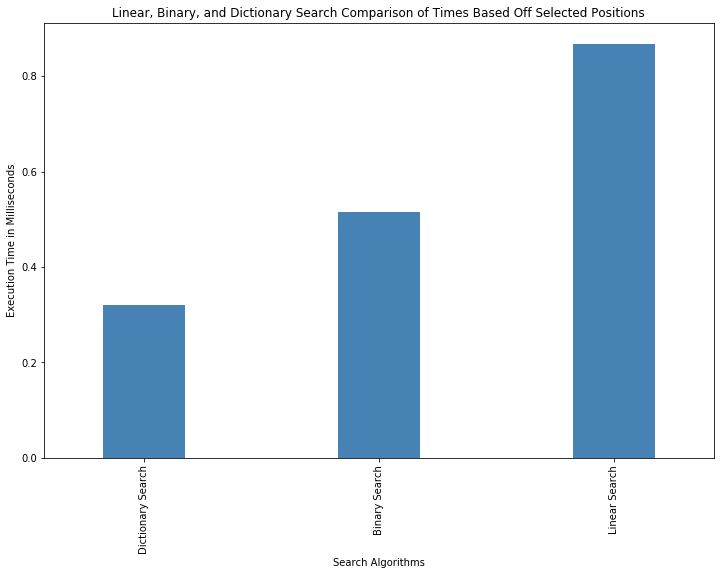

In [253]:
ax = sorted_lsbs_dict.unstack().plot(kind='bar', width=0.35, color='steelblue', figsize=(12,8))
labels = ['Dictionary Search', 'Binary Search', 'Linear Search']
ax.set_xticklabels(labels)
plt.xlabel('Search Algorithms')
plt.ylabel('Execution Time in Milliseconds')
plt.title('Linear, Binary, and Dictionary Search Comparison of Times Based Off Selected Positions')
plt.show();

### Conclusion:

In this exercise hash tables were examined by creating a dictionary data structure that used hashing in the back-end. Basically, a hash table is a data structure that has keys and values that are mapped together. Retrieving data from a hash table is very fast, making them powerful and useful, especially to the data engineer. It is an effective means to store and search data due to its performance and flexibility, particularly when dealing with complex data. 

The following exercise compared the performance of hash tables with two other search algorithms, linear and binary search. Linear search works by searching one item at a time, and will eliminate one item at a time if there is not a match. On the other hand, binary search works by taking the middle item and eliminates half the items every time if the search value is not found based on the "guesses" being either too high or too low.

For comparison, a list of 100 randomly generated names were created. They were stored in an unsorted array, and a dictionary data structure was created based off the names. 5 random names were searched using linear search and dictionary search. The names in the unsorted array were then sorted using quicksort, and 6 names were selected based on the 10th, 30th, 50th, 70th, 90th, and 100th positions. The 6 names were then searched using binary and linear search, and were also retrieved from the dictionary that was based off the original unsorted array. Execution times were recorded. With regards to its effectiveness and performance, retrieving data from the dictionary showed the best results.

In Big O notation, on average, dictionary search, insertion, and deletion will take **O(1)** time. The value expressed is also known as constant time, or the fixed amount of time it takes to complete a task. However, at its worst case it can take **O(*n*)** time due to collisions. Big O Run time for linear search is **O(*n*)**, also known as linear time, as each *n* element is checked. For binary search, Big O Run time is **O(*log n*)**, also known as log time. Log in this case is base 2 as log *n* elements are checked in the worst case. Although binary search is better than linear search, and is very quick as it takes **O(*log n*)** time, the **O(1)** constant of dictionary search will at many times be quicker, as the number of items does not matter, whereas the number of items still matter for binary search. In addition, whether or not items are sorted does not make a difference for dictionary search, though they make a significant difference with binary search, as the algorithm will not work properly unless the data is sorted.         

Based on the results it is recommended that hash tables are used for storing data, though collisions and load factors can become an issue. It is therefore important for the data engineer to know how hash tables are implemented and how they function, as they are critical to building a well-rounded, effective, and efficient system. 

### References:
[1] Bhargava, A. Y.(2016.) Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People. Shelter Island, N.Y.: Manning.